# **Libraries**

In [ ]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#tensorflow imports
import tensorflow as tf

#NLP lbraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#sklearn imports
from sklearn.model_selection import train_test_split

#preprocessing imports
import string

In [ ]:
# download data to help us in preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Reading data

In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown 'https://drive.google.com/drive/u/5/my-drive'

/usr/local/lib/python3.8/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/u/5/my-drive
To: /content/my-drive
568kB [00:00, 39.1MB/s]


In [ ]:
!unzip '/content/drive/MyDrive/Bert/Movie_Reviews.zip' 

Archive:  /content/drive/MyDrive/Bert/Movie_Reviews.zip
  inflating: Movie_Reviews.csv       


In [ ]:
# Read dataset as csv from drive
data='/content/Movie_Reviews.csv'

In [ ]:
# Read csv file from pandas library
data = pd.read_csv(data,  header=None, names=['Review', 'Sentiment'])
data = data.iloc[1:]

In [ ]:
# Print the shape of data
data.shape

(50000, 2)

In [ ]:
# Print 5 samples of data
data.sample(5)

,Review,Sentiment
28139,I am very sorry that this charming and whimsic...,positive
32524,I dug out from my garage some old musicals and...,positive
45123,"This is one of my favorite series, all categor...",positive
24776,Sorry this movie was a bad made for TV movie. ...,negative
14965,I am astounded at the positive reviews for thi...,negative


In [ ]:
# Print first 5 rows of data
data.head(5)

,Review,Sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
5,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Preprocessing

In [ ]:
# Lowercase all characters
data['Review']=data['Review'].str.lower()
data['Sentiment']=data['Sentiment'].str.lower()
data.head(5)

,Review,Sentiment
1,one of the other reviewers has mentioned that ...,positive
2,a wonderful little production. <br /><br />the...,positive
3,i thought this was a wonderful way to spend ti...,positive
4,basically there's a family where a little boy ...,negative
5,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
# punctuation which we want to remove it
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# function to remove punctuation
def remove_punctuation(text):
  txt_nonpunc = "".join([c for c in text if c not in string.punctuation])
  return txt_nonpunc

In [ ]:
# remove punctuation by using remove_punctuation function
data['Review'] = data['Review'].apply(lambda x: remove_punctuation(x))
data.head(5)

,Review,Sentiment
1,one of the other reviewers has mentioned that ...,positive
2,a wonderful little production br br the filmin...,positive
3,i thought this was a wonderful way to spend ti...,positive
4,basically theres a family where a little boy j...,negative
5,petter matteis love in the time of money is a ...,positive


In [ ]:
# Stopwords we want to remove it
stop_words = stopwords.words('english')
print(len(stop_words))
stop_words

179


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# function to remove stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stop_words])

In [ ]:
data['Review'] = data['Review'].apply(lambda x: remove_stopwords(x))
data.head(5)

In [ ]:
# try Lemmatization of two words (funny)
lemmatizer=WordNetLemmatizer()
print(lemmatizer.lemmatize("Saboteurs"))
print(lemmatizer.lemmatize("cars"))

In [ ]:
# function to make Lemmatization of words
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    return " ".join([lemmatizer.lemmatize(w) for w in text.split(' ')])

In [ ]:
# Lemmatization of words
data['Review'] = data['Review'].apply(lambda x: lemmatize(x))
data.head(5)

In [ ]:
data.head(5)

# Spliting

In [ ]:
# changing positive and negative into numeric values

def cat2num(value):
    if value=='positive': 
        return 1
    else: 
        return 0
    
data['Sentiment']  =  data['Sentiment'].apply(cat2num)

In [ ]:
data.head(5)

In [ ]:
#split the data into training set 80% and test set 20% 
X_train, X_test, Y_train, Y_test = train_test_split(data['Review'],data['Sentiment'],train_size=0.8,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
#split the training data into 70% training and 10% validation
valid_percentage = int(data.size/2 * 0.1)
X_valid = X_train[:valid_percentage]
X_train = X_train[valid_percentage:]
Y_valid = Y_train[:valid_percentage]
Y_train = Y_train[valid_percentage:] 

In [ ]:
# #split the data into training set 80% and test set 20% 
# train, test= train_test_split(data,train_size=0.8,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
# #split the training data into 70% training and 10% validation
# valid_percentage = int(data.shape[0]* 0.1)
# valid = train[:valid_percentage]
# train=train[valid_percentage:]

# BERT

In [ ]:
# Install the required package
!pip install bert-for-tf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 181 kB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30534 sha256=015c9c6d3458d0fb1bd275dc5b3eda3bbded357f129da4709324db1ce5f4f6f5
  Stored in directory: /root/.cache/pip/wheels/ab/a4/72/df07592cea3ae06b5e846f5e52262f8b16748e829ca354b7df
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19472 sha256=d0ffe7dad722b9167cab4f6289473b03cc682ef26b33288084216b318d6d4bdb
  Stored in directory: /root/.cache/pip/wheels/c7/f3/85/b8cf1d8bfe55dc2ece0f1fcd4e91d6f8fc7b59ff3fd75329e1
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7911 sha256=68bd5b9fa2dd5dcd01063cfe44b8f62d9a11dd709304685af0014aa7e74b83ad
  Stored in directory: /root/.cache/pip/wheels/ac/26/e9/df16869ccbd4abf517f1ff3be9a2c7ee5c5980fc87eea04fb1
Successfully built bert-for-tf2 params-flow p

In [ ]:
# Import modules
import os
import bert
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# https://www.tensorflow.org/official_models/fine_tuning_bert
gs_folder_bert = "gs://cloud-tpu-checkpoints/bert/v3/uncased_L-12_H-768_A-12"
tf.io.gfile.listdir(gs_folder_bert)
tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file = os.path.join(gs_folder_bert, "vocab.txt"), do_lower_case=True)
print("Vocab size:", len(tokenizer.vocab))
tokens = tokenizer.tokenize("Hello TensorFlow!")
print(tokens)
ids = tokenizer.convert_tokens_to_ids(tokens)

Vocab size: 30522
['hello', 'tensor', '##flow', '!']


In [ ]:
def create_tonkenizer(bert_layer):
    """Instantiate Tokenizer with vocab"""
    vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
    do_lower_case = bert_layer.resolved_object.do_lower_case.numpy() 
    tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file, do_lower_case)
    print("Vocab size:", len(tokenizer.vocab))
    return tokenizer

In [ ]:
def get_ids(tokens, tokenizer, MAX_SEQ_LEN):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (MAX_SEQ_LEN - len(token_ids))
    return input_ids

In [ ]:
def get_masks(tokens, MAX_SEQ_LEN):
    """Masks: 1 for real tokens and 0 for paddings"""
    return [1] * len(tokens) + [0] * (MAX_SEQ_LEN - len(tokens))

In [ ]:
def get_segments(tokens, MAX_SEQ_LEN):
    """Segments: 0 for the first sequence, 1 for the second"""  
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (MAX_SEQ_LEN - len(tokens))

In [ ]:
def create_single_input(sentence, tokenizer, max_len):
    """Create an input from a sentence"""
    stokens = tokenizer.tokenize(sentence)
    stokens = stokens[:max_len] 
    stokens = ["[CLS]"] + stokens + ["[SEP]"]
    return get_ids(stokens, tokenizer, max_len+2), get_masks(stokens, max_len+2), get_segments(stokens, max_len+2)

In [ ]:
def convert_sentences_to_features(sentences, tokenizer, MAX_SEQ_LEN):
    """Convert sentences to features: input_ids, input_masks and input_segments"""
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences, position=0, leave=True):
      ids, masks, segments = create_single_input(sentence, tokenizer, MAX_SEQ_LEN-2) # why -2 ? ans: reserved for [CLS] & [SEP]
      input_ids.append(ids)
      input_masks.append(masks)
      input_segments.append(segments)
    return [np.asarray(input_ids, dtype=np.int32), np.asarray(input_masks, dtype=np.int32), np.asarray(input_segments, dtype=np.int32)]

In [ ]:
def nlp_model(bert_base):
    # Load the pre-trained BERT base model
    bert_layer = hub.KerasLayer(handle=bert_base, trainable=False)  
    # BERT layer three inputs: ids, masks and segments
    input_ids = Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name="input_ids")           
    input_masks = Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name="input_masks")       
    input_segments = Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name="segment_ids")

    inputs = [input_ids, input_masks, input_segments] # BERT inputs
    pooled_output, sequence_output = bert_layer(inputs) # BERT outputs
    x = Dense(units=768, activation='relu')(pooled_output)
    x=Dropout(0.15)(x)
    x = Dense(units=512, activation='relu')(x) # hidden layer
    x=Dropout(0.15)(x) 
    x = Dense(units=256, activation='relu')(x) # hidden layer 
    x=Dropout(0.15)(x)
    x = Dense(units=128, activation='relu')(x) # hidden layer 
    x=Dropout(0.15)(x)
    x = Dense(units=64, activation='relu')(x) # hidden layer 
    x=Dropout(0.15)(x)
    outputs = Dense(2, activation="softmax")(x) # output layer
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
# hyper-parameters
BATCH_SIZE = 8
EPOCHS = 10
MAX_SEQ_LEN = 100

In [ ]:
# model construction (we construct model first inorder to use bert_layer's tokenizer)
bert_base = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1"


In [ ]:
model = nlp_model(bert_base) 

# we would like to use bert tokenizer; therefore, chech model.summary() and find the index of bert_layer
tokenizer = create_tonkenizer(model.layers[3])

Vocab size: 30522


In [ ]:
for i in range(3):
    model.layers[i].trainable = False

In [ ]:
# create training data and testing data
x_train = convert_sentences_to_features(X_train, tokenizer, MAX_SEQ_LEN)
x_valid = convert_sentences_to_features(X_valid, tokenizer, MAX_SEQ_LEN)
x_test = convert_sentences_to_features(X_test, tokenizer, MAX_SEQ_LEN)

100%|██████████| 10000/10000 [00:22<00:00, 452.16it/s]


In [ ]:
y_train = to_categorical(Y_train)
y_valid = to_categorical(Y_valid)
y_test = to_categorical(Y_test)

In [ ]:
def scheduler(epoch, lr):
     if epoch < 2:
         return lr
     else:
         return lr * tf.math.exp(-0.5)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
# use adam optimizer to minimize the categorical_crossentropy loss
optimizer = Adam(learning_rate=2e-05)

model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])


In [ ]:
#  model.load_weights('/content/drive/MyDrive/Bert/Dense/')

In [ ]:

# fit the data to the model
bert_history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

Epoch 1/10
4375/4375 [==============================] - 292s 67ms/step - loss: 0.4941 - accuracy: 0.7592 - val_loss: 0.4928 - val_accuracy: 0.7582
Epoch 2/10
4375/4375 [==============================] - 298s 68ms/step - loss: 0.4916 - accuracy: 0.7627 - val_loss: 0.4787 - val_accuracy: 0.7730
Epoch 3/10
4375/4375 [==============================] - 291s 67ms/step - loss: 0.4892 - accuracy: 0.7623 - val_loss: 0.4799 - val_accuracy: 0.7736
Epoch 4/10
4375/4375 [==============================] - 298s 68ms/step - loss: 0.4881 - accuracy: 0.7617 - val_loss: 0.4796 - val_accuracy: 0.7726
Epoch 5/10
4375/4375 [==============================] - 291s 67ms/step - loss: 0.4869 - accuracy: 0.7640 - val_loss: 0.4778 - val_accuracy: 0.7714
Epoch 6/10
4375/4375 [==============================] - 291s 67ms/step - loss: 0.4850 - accuracy: 0.7629 - val_loss: 0.4795 - val_accuracy: 0.7712
Epoch 7/10
4375/4375 [==============================] - 298s 68ms/step - loss: 0.4829 - accuracy: 0.7659 - val_loss: 0

In [ ]:
# save the trained model
model.save_weights('/content/drive/MyDrive/Bert/Dense/')

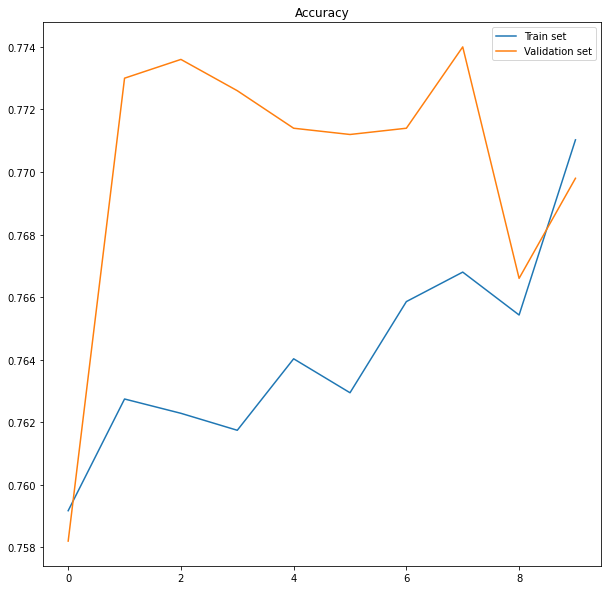

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Accuracy')

xaxis = np.arange(len(bert_history.history['accuracy']))
plt.plot(xaxis, bert_history.history['accuracy'], label='Train set')
plt.plot(xaxis, bert_history.history['val_accuracy'], label='Validation set')
plt.legend()

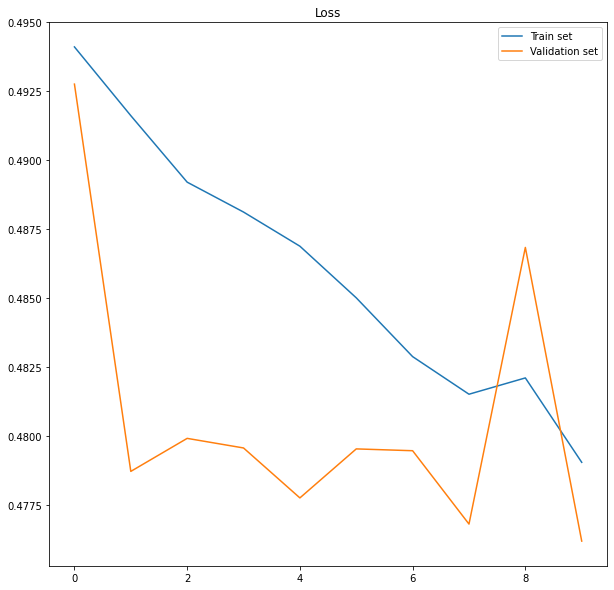

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Loss')

xaxis = np.arange(len(bert_history.history['loss']))
plt.plot(xaxis, bert_history.history['loss'], label='Train set')
plt.plot(xaxis, bert_history.history['val_loss'], label='Validation set')
plt.legend()

In [ ]:
# predict on test dataset
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 68s 213ms/step


In [ ]:
ytest=np.array(Y_test)

In [ ]:
correct=0
for i in range(len(y_pred)):
  if y_pred[i]==ytest[i]:
    correct+=1
print("Model Prediction Accuracy is ",((correct)/len(y_pred))*100)

Model Prediction Accuracy is  76.66


In [ ]:
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      4961
           1       0.79      0.72      0.76      5039

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



# Roberta

In [ ]:
!pip install transformers

In [ ]:
!pip install tokenizers

In [ ]:
import numpy as np
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import os

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
MODEL_NAME = 'roberta-base'
MAX_LEN = 256
ARTIFACTS_PATH = '../artifacts/'

BATCH_SIZE = 8 
EPOCHS = 5

if not os.path.exists(ARTIFACTS_PATH):
    os.makedirs(ARTIFACTS_PATH)

## Prepare dataset

In [ ]:
X_data = data['Review'].to_numpy().reshape(-1)
y_data = data['Sentiment'].to_numpy().reshape(-1)

## Dataset analysis
### As you can see in the following plot, the samples are not balanced. This could cause problems during the training but, since they are not highly unbalanced, I have left it as it is.

### In other cases, such as fraud detecting where the positive classes are very few compared to the negative ones, we must apply techniques to balance it. For example, we could undersample the biggest category

In [ ]:
sentiments = data['Sentiment'].values.reshape(-1)

counter_sentiments = Counter(sentiments)
sentiment_names = counter_sentiments.keys()
sentiment_values = counter_sentiments.values()

y_pos = np.arange(len(sentiment_names))

plt.figure(1, figsize=(10, 5))
plt.bar(y_pos, sentiment_values, align='center', alpha=0.5)
plt.xticks(y_pos, sentiment_names)
plt.ylabel('Number of texts')
plt.title('Distribution of texts per category')
plt.gca().yaxis.grid(True)
plt.show()

print(counter_sentiments)

In [ ]:
def calculate_stats(df, split_char=' '):
    sentiments = df['Sentiment'].unique()
    
    all_lengths = []
    per_sentiment = {
        'lengths': {c:[] for c in sentiments},
        'mean': {c:0 for c in sentiments},
        'stdev': {c:0 for c in sentiments}
    }

    for index, row in df.iterrows():
        review = row['Review']
        review = re.sub(r"\s+", ' ', review) # Normalize
        review = review.split(split_char)
        l = len(review)
        
        sentiment = row['Sentiment']
        
        all_lengths.append(l)
        per_sentiment['lengths'][sentiment].append(l)
    
    for c in sentiments:
        per_sentiment['mean'][c] = statistics.mean(per_sentiment['lengths'][c])
        per_sentiment['stdev'][c] = statistics.stdev(per_sentiment['lengths'][c])
    
    global_stats = {
        'mean': statistics.mean(all_lengths),
        'stdev': statistics.stdev(all_lengths),
        'lengths': all_lengths
    }
    
    return {
        'global': global_stats,
        'per_sentiment': pd.DataFrame(per_sentiment)
    }


def display_lengths_histograms(df_stats, n_cols=3):
    sentiments = data['Sentiment'].unique()
    n_rows = math.ceil(len(sentiments) / n_cols)
    
    plt.figure(figsize=(15, 8))
    plt.suptitle('Distribution of lengths')
    
    # Subplot of all lengths
    plt.subplot(n_rows, n_cols, 1)
    plt.title('All sentiment')
    lengths = df_stats['global']['lengths']
    plt.hist(lengths, color='r')

    # Subplot of each sentiment
    index_subplot = 2
    for c in sentiments:
        plt.subplot(n_rows, n_cols, index_subplot)
        plt.title('Sentiment: %s' % c)
        
        lengths = df_stats['per_sentiment']['lengths'][c]
        plt.hist(lengths, color='b')

        index_subplot += 1

    plt.show()

Please, note that the tokenization process may split words into several parts, so lengths could increase (or decrease too). This is only an orientative result.

In [ ]:
df_stats = calculate_stats(data)
df_stats['per_sentiment']

In [ ]:
display_lengths_histograms(df_stats)

In [ ]:
n_reviews = len(X_data)
print('Reviews in dataset: %d' % n_reviews)

sentiments = data['Sentiment'].unique()
n_sentiments = len(sentiments)
print('Number of sentiments: %d' % n_sentiments)

print('Done!')


## Tokenize & encode
I am going to import the RoBERTa model from HuggingFace. Note that I must import not only the model but also the tokenizer (since I must use the same vocabulary as the model was trained with).

We should take into account that RoBERTa's input accepts up-to 512 tokens, thus we must truncate the tokenized texts. In my case, I truncate to 256 tokens, but you can put a higher value in the variable MAX_LEN.

In [ ]:
def roberta_encode(reviews, tokenizer):
    ct = len(reviews)
    input_ids = np.ones((ct, MAX_LEN), dtype='int32')
    attention_mask = np.zeros((ct, MAX_LEN), dtype='int32')
    token_type_ids = np.zeros((ct, MAX_LEN), dtype='int32') # Not used in review classification

    for k, review in enumerate(reviews):
        # Tokenize
        tok_review = tokenizer.tokenize(review)
        
        # Truncate and convert tokens to numerical IDs
        enc_review = tokenizer.convert_tokens_to_ids(tok_review[:(MAX_LEN-2)])
        
        input_length = len(enc_review) + 2
        input_length = input_length if input_length < MAX_LEN else MAX_LEN
        
        # Add tokens [CLS] and [SEP] at the beginning and the end
        input_ids[k,:input_length] = np.asarray([0] + enc_review + [2], dtype='int32')
        
        # Set to 1s in the attention input
        attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [ ]:
# Import tokenizer from HuggingFace
tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
xtrain = roberta_encode(X_train, tokenizer)
xvalid = roberta_encode(X_valid, tokenizer)

ytrain = np.asarray(Y_train, dtype='int32')
yvalid = np.asarray(Y_valid, dtype='int32')

## Create RoBERTa model

In [ ]:
def build_model(n_sentiments):
  input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
  input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
  input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

  # Import RoBERTa model from HuggingFace
  roberta_model = TFRobertaModel.from_pretrained(MODEL_NAME)
  x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

  # Huggingface transformers have multiple outputs, embeddings are the first one,
  # so let's slice out the first position
  x = x[0]

  x = tf.keras.layers.Dropout(0.1)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.Dense(units=512, activation='relu')(x) # hidden layer 
  x = tf.keras.layers.Dense(units=256, activation='relu')(x) # hidden layer 
  x = tf.keras.layers.Dense(units=128, activation='relu')(x) # hidden layer 
  x = tf.keras.layers.Dense(units=64, activation='relu')(x)
  x = tf.keras.layers.Dense(n_sentiments, activation='softmax')(x)

  model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
  model.compile(
            optimizer=tf.keras.optimizers.Adam(lr=1e-5),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

  return model

In [ ]:
r_model = build_model(n_sentiments)
r_model.summary()

In [ ]:
r_model.layers[3].trainable = False

## Train model

In [ ]:
roberta_history = r_model.fit(xtrain,
                        ytrain,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        verbose=1,
                        validation_data=(xvalid, yvalid))

In [ ]:
# This plot will look much better if we train models with more epochs, but anyway here is
plt.figure(figsize=(10, 10))
plt.title('Accuracy')

xaxis = np.arange(len(roberta_history.history['accuracy']))
plt.plot(xaxis, roberta_history.history['accuracy'], label='Train set')
plt.plot(xaxis, roberta_history.history['val_accuracy'], label='Validation set')
plt.legend()

## Evaluation
 In a confusion matrix, we can see how many aentiments are classified c

In [ ]:
def plot_confusion_matrix(X_test, y_test, model):
    y_pred = model.predict(X_test)
    y_pred = [np.argmax(i) for i in model.predict(X_test)]

    con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
    label_names = list(range(len(con_mat_norm)))

    con_mat_df = pd.DataFrame(con_mat_norm,
                              index=label_names, 
                              columns=label_names)

    figure = plt.figure(figsize=(10, 10))
    sns.heatmap(con_mat_df, cmap=plt.cm.Blues, annot=True)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

In [ ]:
plot_confusion_matrix(X_test, y_test, model)

# RNN

In [ ]:
# Load Dependencies

from keras.models import Sequential
# from keras.layers.core import Activation
from keras.layers import Dense, Dropout, Embedding, SimpleRNN,LSTM
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_valid = tokenizer.texts_to_sequences(X_valid)

vocab_size=len(tokenizer.word_index)
vocab_size

In [ ]:
max_words = 250

X_train = pad_sequences(X_train,padding='post' ,maxlen=max_words)
X_test  =  pad_sequences(X_test, padding='post' ,maxlen=max_words)
X_valid =  pad_sequences(X_valid, padding='post' ,maxlen=max_words)

In [ ]:
# RNN_model = Sequential()
# # Add Embedding layer
# RNN_model.add(Embedding(max_features, embedding_size, input_length=max_length))
# RNN_model.add(Dropout(dropout_rate))
# # Add Simple RNN layer
# RNN_model.add(SimpleRNN(units=100 , activation="tanh" , use_bias=False , bias_initializer="zeros" , dropout=0.0 , go_backwards=False))
# # Add Dense Hidden Layer
# RNN_model.add(Dense(hidden_layer_size, activation='relu'))
# RNN_model.add(Dropout(dropout_rate))
# # Output Layer 
# RNN_model.add(Dense(no_classes, activation='sigmoid'))


# RNN_model = Sequential()
# # Add Embedding layer
# RNN_model.add(Embedding(max_features, embedding_size, input_length=max_length))
# RNN_model.add(Dropout(dropout_rate))
# # Add Simple RNN layer
# RNN_model.add(SimpleRNN(input_dim=1, output_dim=25, batch_input_shape=(1, 3)))
# # Add Dense Hidden Layer
# RNN_model.add(Dense(hidden_layer_size, activation='relu'))
# RNN_model.add(Dropout(dropout_rate))
# # Output Layer 
# RNN_model.add(Dense(no_classes, activation='sigmoid'))



# # RNN_model = Sequential()
# # RNN_model.add(Embedding(max_features, embedding_size,input_length=max_length) )
# # RNN_model.add(LSTM(128,return_sequences=True))
# # RNN_model.add(LSTM(32))

# # RNN_model.add(Dense(1, activation='sigmoid'))

embedding_size=32
RNN_model=Sequential()
RNN_model.add(Embedding(vocab_size, embedding_size, input_length=max_words))
RNN_model.add(LSTM(100))
RNN_model.add(Dense(1, activation='sigmoid'))

In [ ]:
RNN_model.summary()

In [ ]:
RNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
batch_size = 64
num_epochs = 10

history=RNN_model.fit(X_train, Y_train, batch_size=batch_size, verbose=1, epochs=num_epochs, validation_data=(X_valid, Y_valid))

In [ ]:
# graph to show (Loss)
plt.title('Loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.xlabel('loss')
plt.legend(loc='upper right')

In [ ]:
# graph to show (Accuracy)
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend(loc='lower right')
plt.show()

In [ ]:
ModelLoss, ModelAccuracy = RNN_model.evaluate(X_test, Y_test)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

In [ ]:
pred=RNN_model.predict(X_test)

In [ ]:
pred=[int(np.round(elements)) for elements in pred]

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,f1_score,accuracy_score,precision_score,recall_score,plot_confusion_matrix

In [ ]:
# Accuracy: Percentage of correct predictions
# Precision: Correct positive predictions relative to total positive predictions
# Recall: Correct positive predictions relative to total actual positives
fscore=f1_score(Y_test, pred, average='macro')
accuracy=accuracy_score(Y_test, pred)
precision=(precision_score(Y_test, pred, average='macro'))
recall=recall_score(Y_test, pred, average='macro')
print(f' Accuracy = {accuracy}\nPrecision = {precision}\n  Recall  = {recall}\n  fscore  = {fscore}')

In [ ]:
CLASSES=['negative','positive']
cr=classification_report(Y_test, pred ,target_names=CLASSES)
print(cr)

In [ ]:
cm=confusion_matrix(y_true=Y_test, y_pred=pred)
print(cm)

In [ ]:
np.random.seed(0)

labels = [f'class_{i+1}' for i in range(104)]

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(
    Y_test, pred, display_labels=labels, xticks_rotation="vertical",
    ax=ax, colorbar=False, cmap=plt.cm.Blues)

In [ ]:
import seaborn as sns
index = CLASSES 
columns = CLASSES 
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,10))  
sns.heatmap(cm_df, annot=True)

In [ ]:
y_actual = pd.Series(Y_test, name='Actual')
y_predicted = pd.Series(pred, name='Predicted')
h=(pd.crosstab(y_actual, y_predicted,rownames=['Actual'], colnames=['Predicted']))
h